In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
import os

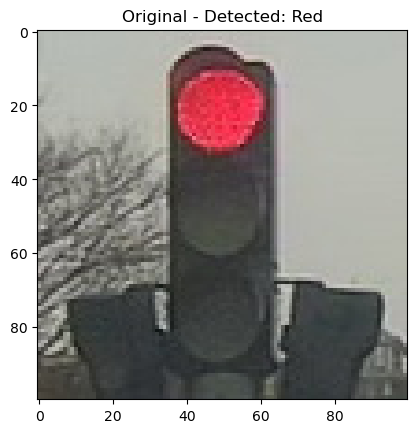

The light in 100_01.jpg is: Red. Saved_Name: red_01.jpg


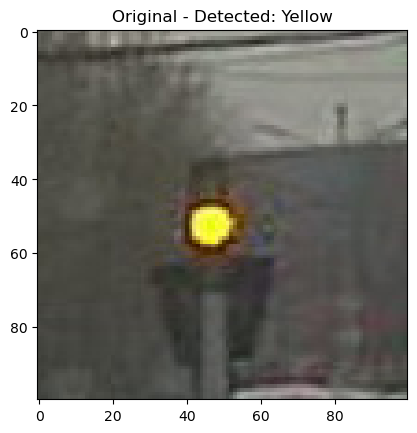

The light in 100_02.jpg is: Yellow. Saved_Name: yellow_01.jpg


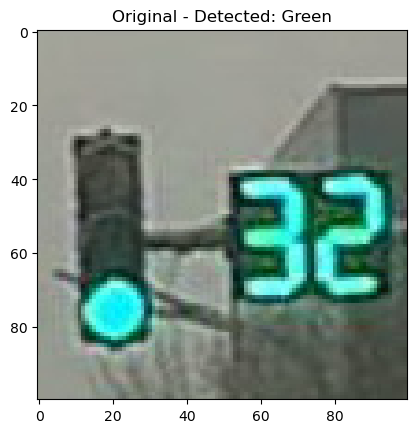

The light in 100_03.jpg is: Green. Saved_Name: green_01.jpg


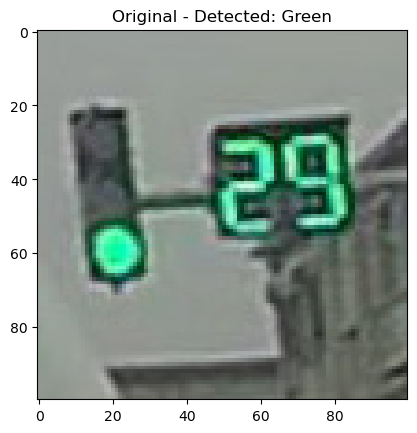

The light in 100_04.jpg is: Green. Saved_Name: green_02.jpg


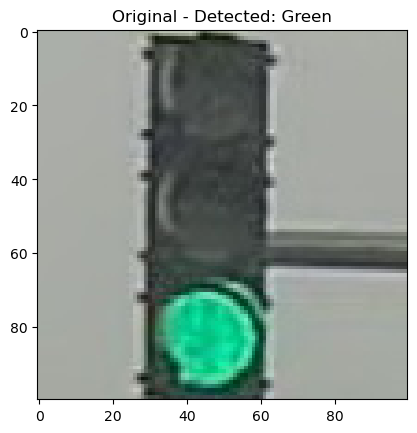

The light in 100_05.jpg is: Green. Saved_Name: green_03.jpg


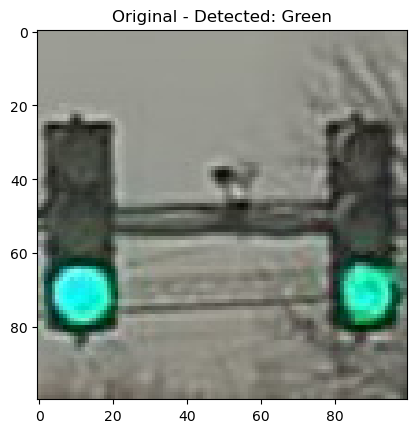

The light in 100_06.jpg is: Green. Saved_Name: green_04.jpg


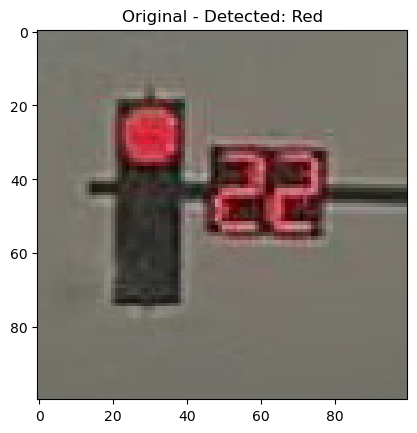

The light in 100_07.jpg is: Red. Saved_Name: red_02.jpg


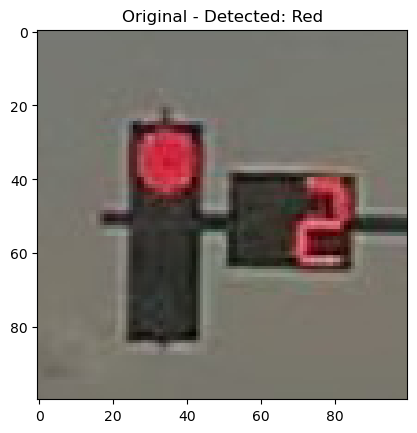

The light in 100_08.jpg is: Red. Saved_Name: red_03.jpg


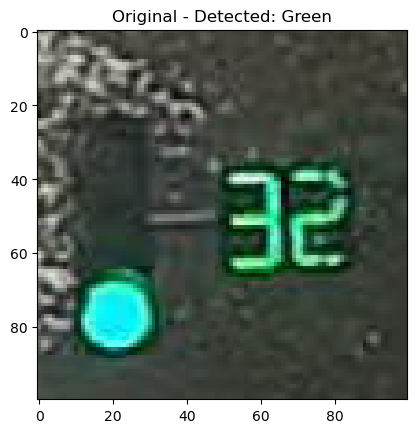

The light in 100_09.jpg is: Green. Saved_Name: green_05.jpg


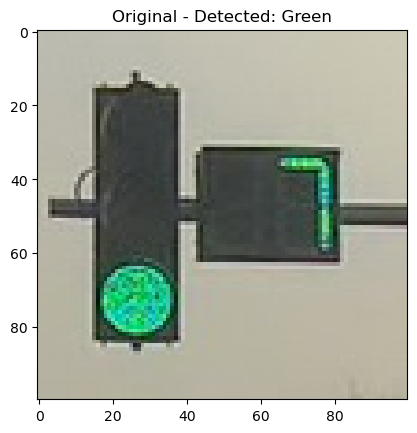

The light in 100_10.jpg is: Green. Saved_Name: green_06.jpg


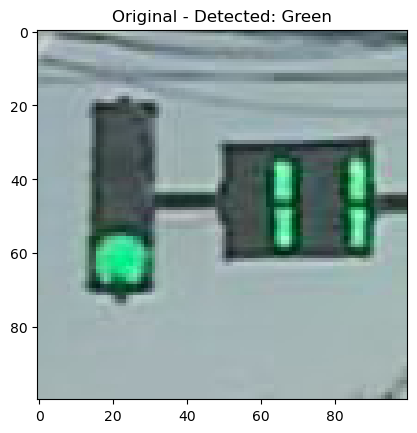

The light in 100_11.jpg is: Green. Saved_Name: green_07.jpg


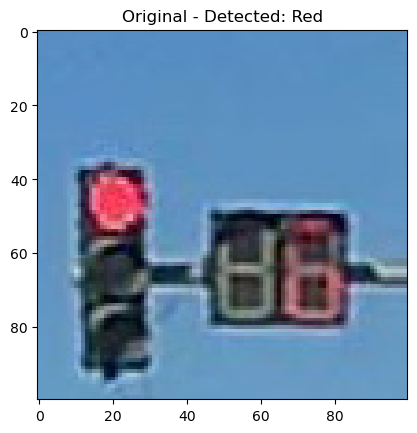

The light in 100_12.jpg is: Red. Saved_Name: red_04.jpg


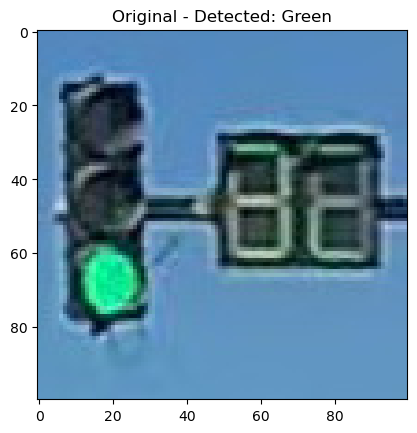

The light in 100_13.jpg is: Green. Saved_Name: green_08.jpg


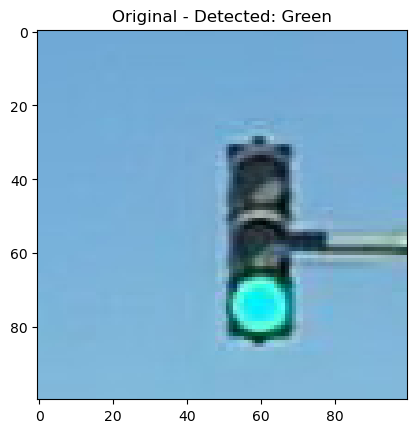

The light in 100_14.jpg is: Green. Saved_Name: green_09.jpg


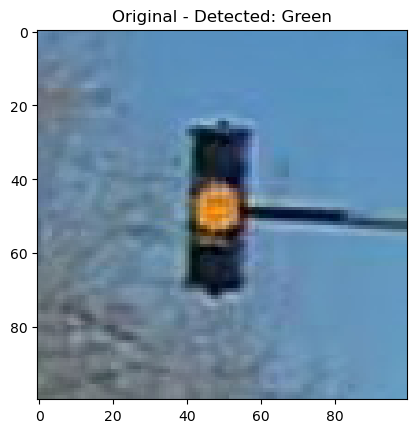

The light in 100_15.jpg is: Green. Saved_Name: green_10.jpg


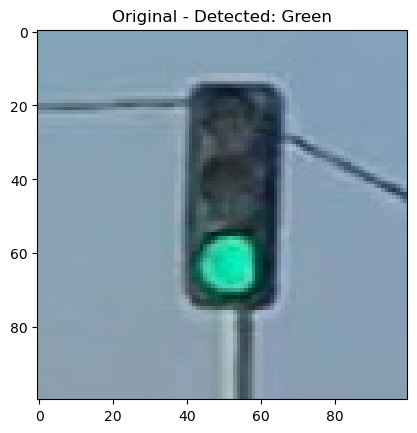

The light in 100_16.jpg is: Green. Saved_Name: green_11.jpg


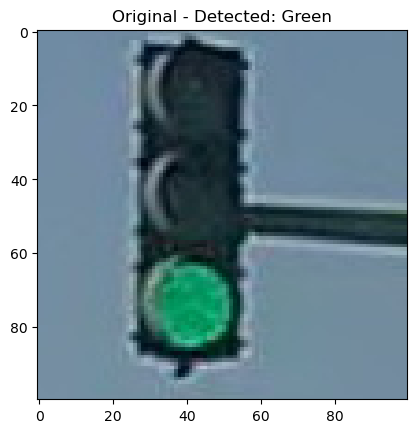

The light in 100_17.jpg is: Green. Saved_Name: green_12.jpg


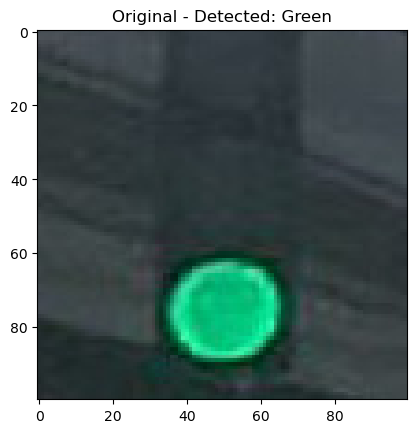

The light in 100_18.jpg is: Green. Saved_Name: green_13.jpg


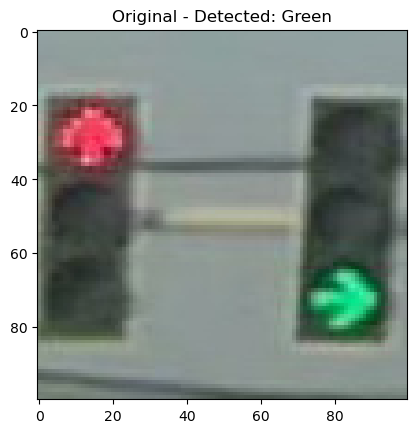

The light in 100_19.jpg is: Green. Saved_Name: green_14.jpg


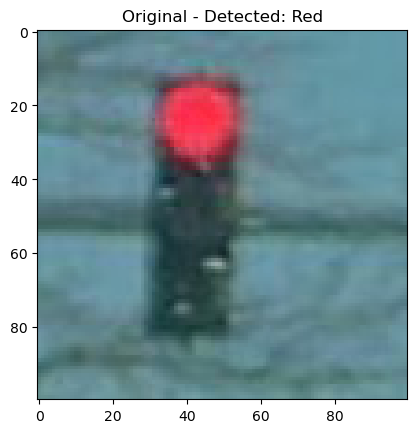

The light in 100_20.jpg is: Red. Saved_Name: red_05.jpg


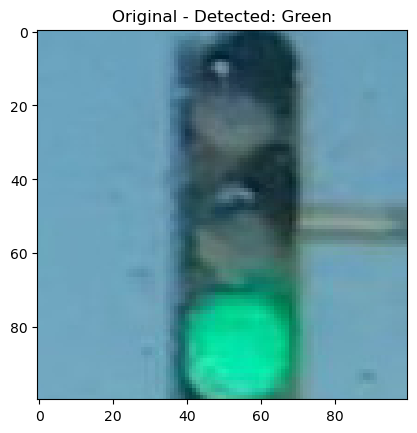

The light in 100_21.jpg is: Green. Saved_Name: green_15.jpg


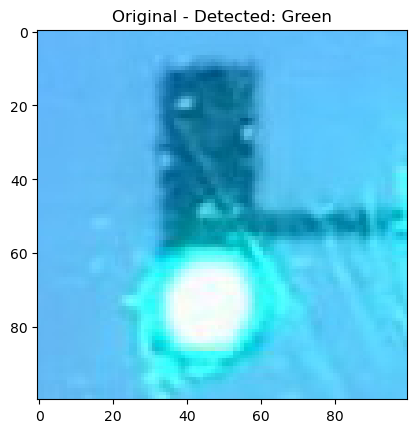

The light in 100_22.jpg is: Green. Saved_Name: green_16.jpg


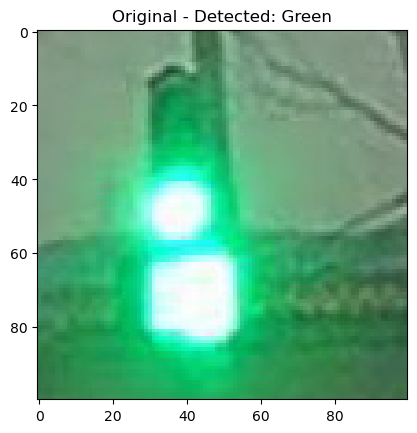

The light in 100_23.jpg is: Green. Saved_Name: green_17.jpg


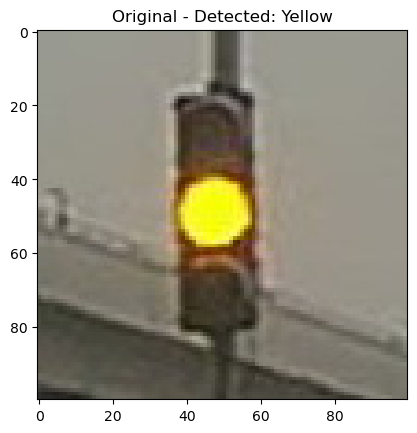

The light in 100_24.jpg is: Yellow. Saved_Name: yellow_02.jpg


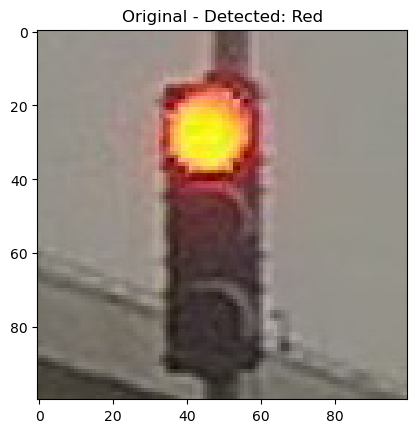

The light in 100_25.jpg is: Red. Saved_Name: red_06.jpg


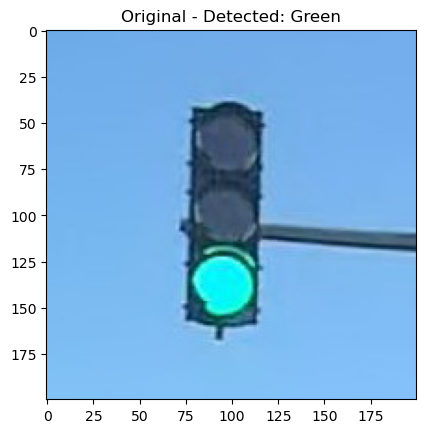

The light in 200_01.jpg is: Green. Saved_Name: green_18.jpg


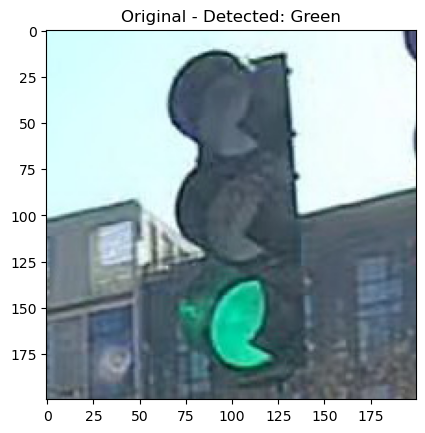

The light in 200_02.jpg is: Green. Saved_Name: green_19.jpg


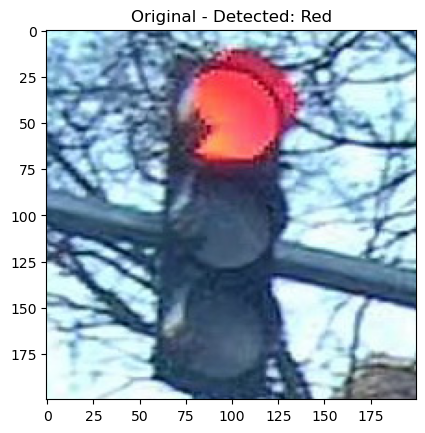

The light in 200_03.jpg is: Red. Saved_Name: red_07.jpg


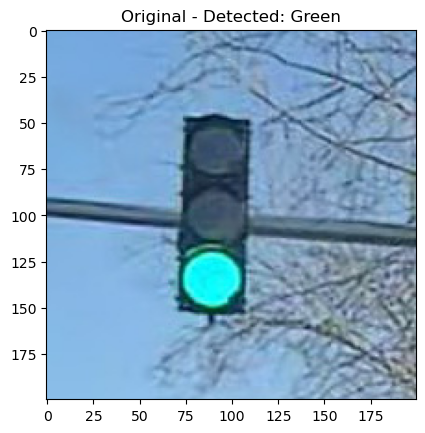

The light in 200_04.jpg is: Green. Saved_Name: green_20.jpg


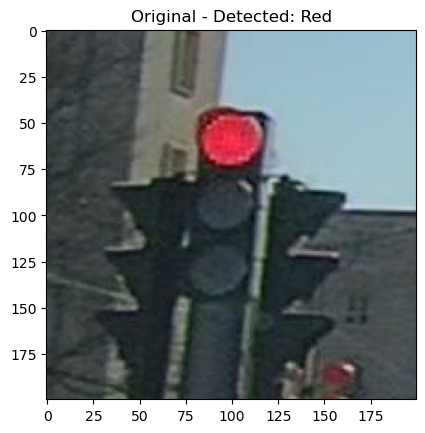

The light in 200_05.jpg is: Red. Saved_Name: red_08.jpg


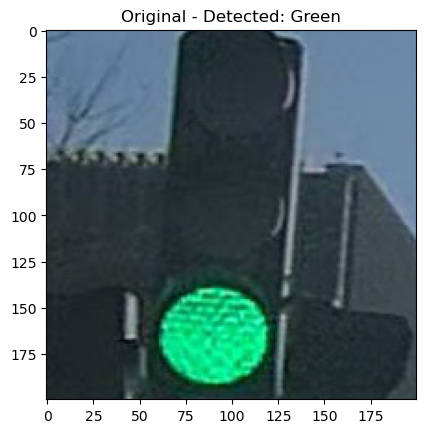

The light in 200_06.jpg is: Green. Saved_Name: green_21.jpg


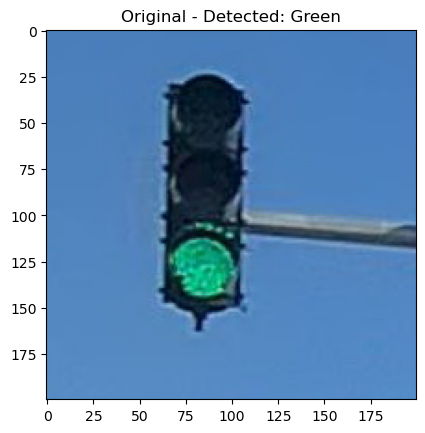

The light in 200_07.jpg is: Green. Saved_Name: green_22.jpg


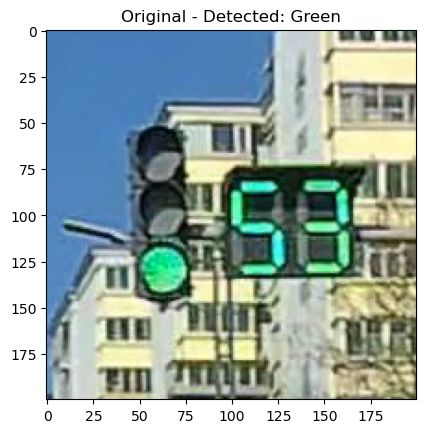

The light in 200_08.jpg is: Green. Saved_Name: green_23.jpg


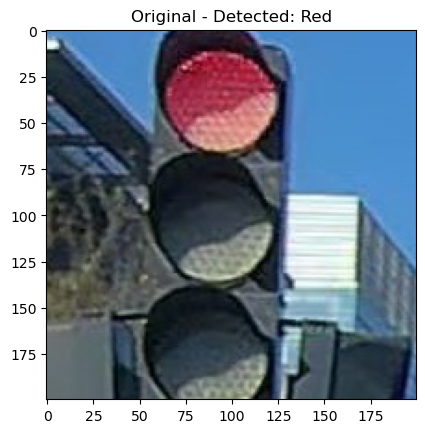

The light in 200_09.jpg is: Red. Saved_Name: red_09.jpg


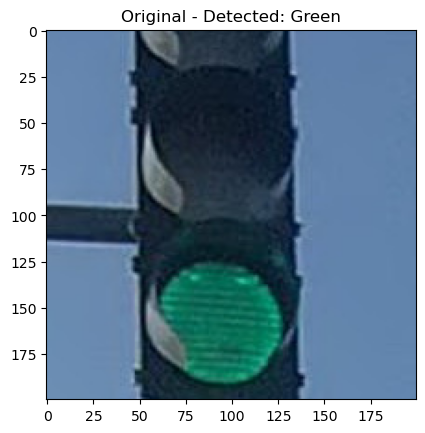

The light in 200_10.jpg is: Green. Saved_Name: green_24.jpg


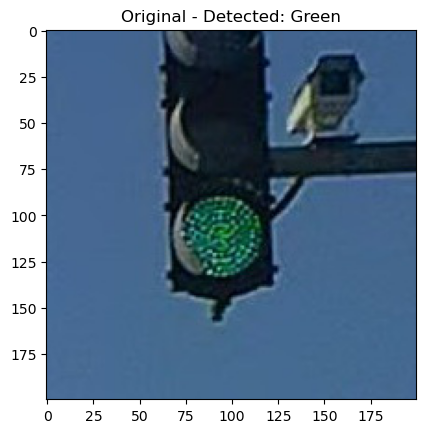

The light in 200_11.jpg is: Green. Saved_Name: green_25.jpg


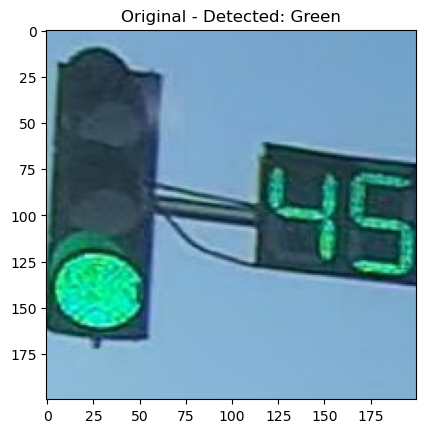

The light in 200_12.jpg is: Green. Saved_Name: green_26.jpg


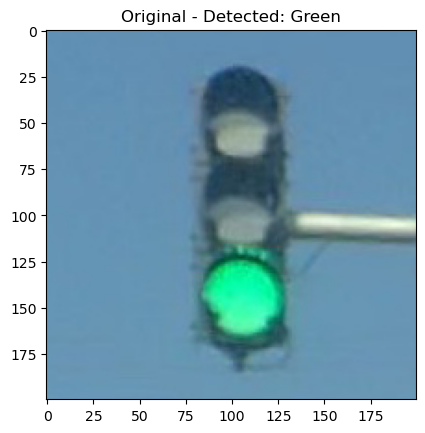

The light in 200_13.jpg is: Green. Saved_Name: green_27.jpg


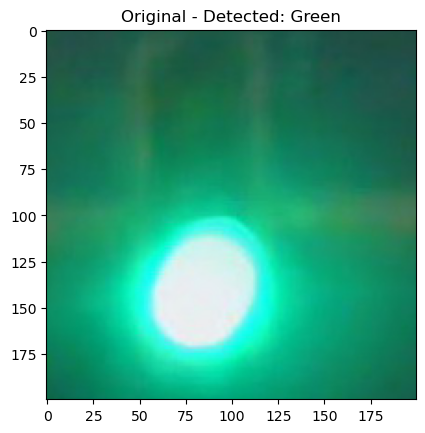

The light in 200_14.jpg is: Green. Saved_Name: green_28.jpg


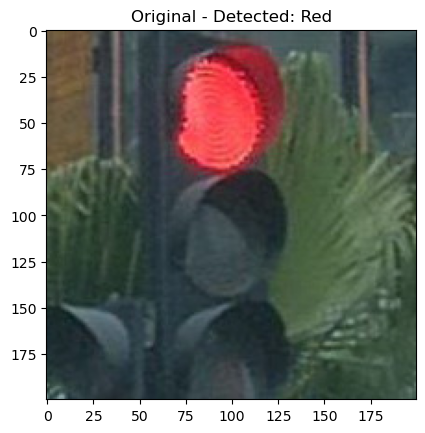

The light in 200_15.jpg is: Red. Saved_Name: red_10.jpg


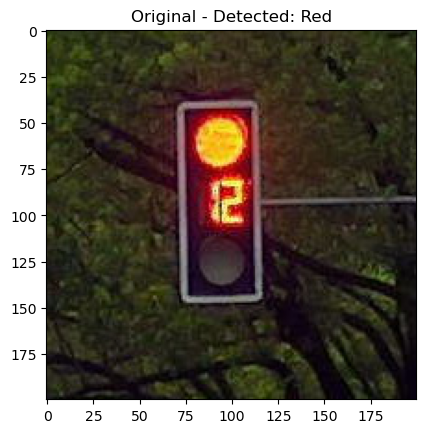

The light in 200_16.jpg is: Red. Saved_Name: red_11.jpg


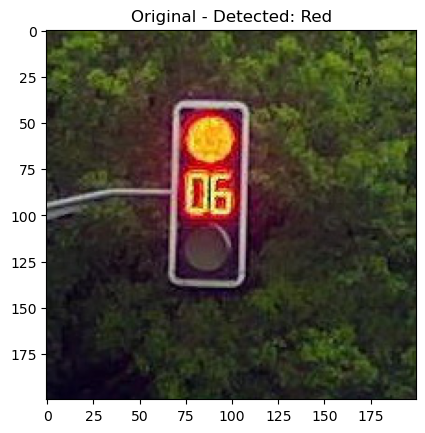

The light in 200_17.jpg is: Red. Saved_Name: red_12.jpg


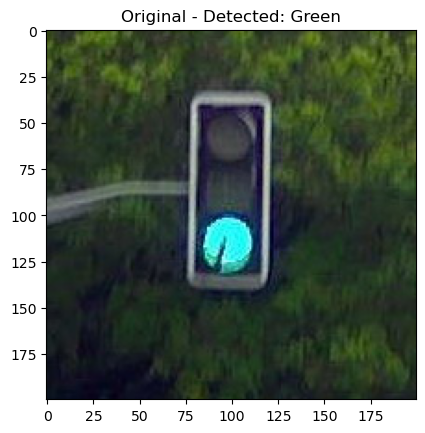

The light in 200_18.jpg is: Green. Saved_Name: green_29.jpg


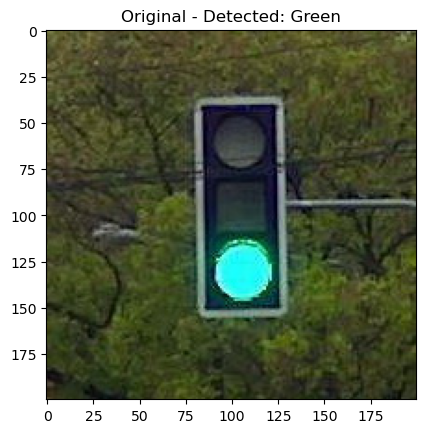

The light in 200_19.jpg is: Green. Saved_Name: green_30.jpg


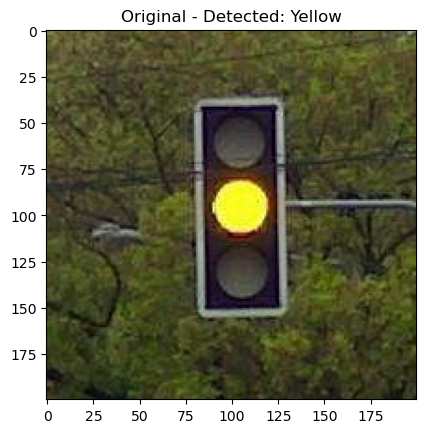

The light in 200_20.jpg is: Yellow. Saved_Name: yellow_03.jpg


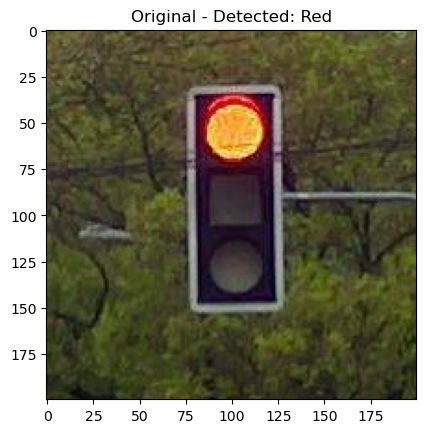

The light in 200_21.jpg is: Red. Saved_Name: red_13.jpg


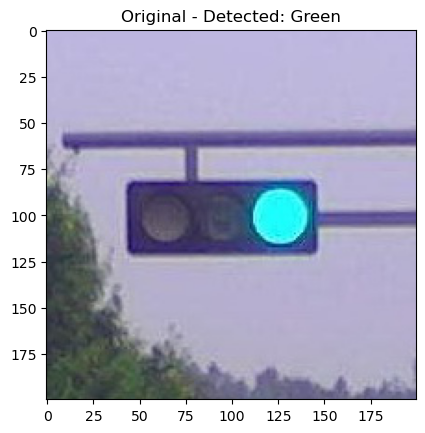

The light in 200_22.jpg is: Green. Saved_Name: green_31.jpg


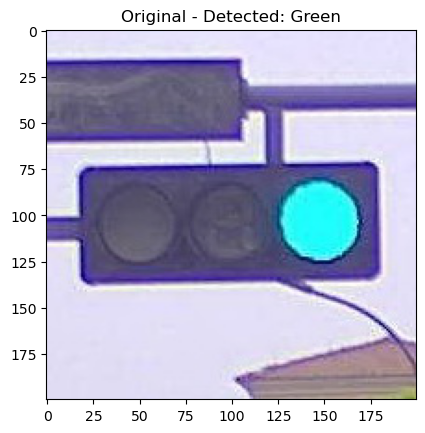

The light in 200_23.jpg is: Green. Saved_Name: green_32.jpg


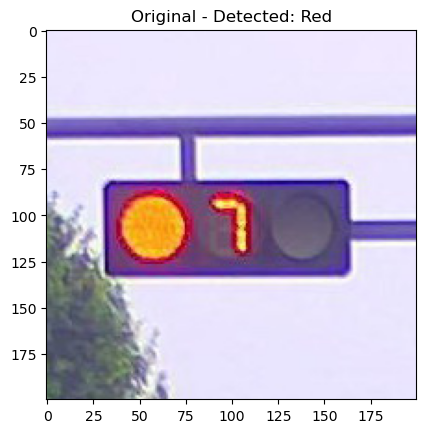

The light in 200_24.jpg is: Red. Saved_Name: red_14.jpg


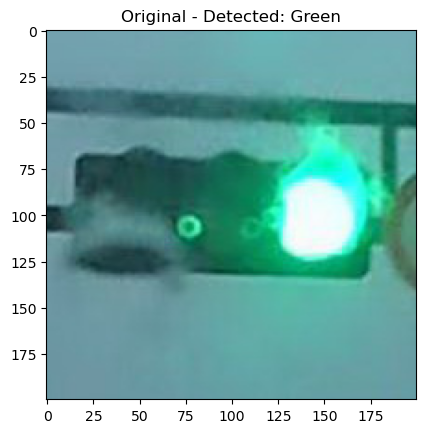

The light in 200_25.jpg is: Green. Saved_Name: green_33.jpg


In [29]:
def detect_light_color(image_path, threshold=500):
    img_rgb = cv.imread(image_path)
    img_hsv = cv.cvtColor(img_rgb, cv.COLOR_BGR2HSV)


    mask_red_1 = cv.inRange(img_hsv, (0, 55, 46), (10 , 255, 255))
    mask_red_2 = cv.inRange(img_hsv, (169, 55, 46), (180, 255, 255))
    mask_red = cv.bitwise_or(mask_red_1, mask_red_2)
    mask_green_1 = cv.inRange(img_hsv, (45, 43, 46), (90, 255, 255))
    mask_green_2 = cv.inRange(img_hsv, (100, 50, 150), (110, 150, 200))
    mask_green = cv.bitwise_or(mask_green_1, mask_green_2)
    mask_yellow_1 = cv.inRange(img_hsv, (20, 0, 46), (42, 50, 255))
    mask_yellow_2 = cv.inRange(img_hsv, (20, 100, 70), (45, 175, 130))
    mask_yellow = cv.bitwise_or(mask_yellow_1, mask_yellow_2)



    num_red = cv.countNonZero(mask_red)
    num_green = cv.countNonZero(mask_green)
    num_yellow = cv.countNonZero(mask_yellow)

    light = "Unknown"
    if num_red > threshold:
        light = "Red"
    elif num_green > threshold:
        light = "Green"
    elif num_yellow > threshold:
        light = "Yellow"
    
    return light, img_rgb

orign_folder = "tlights/"
output_folder = "new_folder"

if not os.path.exists(output_folder):
    os.makedirs(output_folder)


image_files = [f for f in os.listdir(orign_folder) if f.endswith('.jpg')]


color_counter = {"Red": 0, "Green": 0, "Yellow": 0, "Unknown": 0}


for image_file in image_files:
    image_path = os.path.join(orign_folder, image_file)
    light, img_rgb = detect_light_color(image_path)
    
    color_counter[light] += 1

    new_filename = f"{light.lower()}_{color_counter[light]:02d}.jpg"
    new_filepath = os.path.join(output_folder, new_filename)
    
    cv.imwrite(new_filepath, img_rgb)
    plt.imshow(cv.cvtColor(img_rgb, cv.COLOR_BGR2RGB))
    plt.title(f"Original - Detected: {light}")
    plt.show()
    print(f"The light in {image_file} is: {light}. Saved_Name: {new_filename}")
